# 큐 queue
- 데이터 임시 저장할 때 사용하는 대표적인 자료구조
- FIFO : first in first out
- 인큐, 디큐, 프런트(큐의 맨 앞 원소), 리어(큐의 맨끝 원소)
- 맨 앞 데이터 que[0]을 꺼내고 모든 원소를 앞으로 옮겨야 함
    
    -> 시간 복잡도 O(n)으로 효율성 낮아짐

### 우선순위 큐

### 링 버퍼
- 링 버퍼로 큐를 구현하면 원소를 옮길 필요 없이,
<br>프런트front와 리어rear 인덱스만 업데이트
- 인큐 : rear 값 1증가
- 디큐 : front 값 1증가
- 오래된 데이터 버리기 용도 :
<br>원소 수가 n인 배열에 가장 최근 입력 받은
<br>n개의 데이터만 저장하고 오래된 데이터는 버림

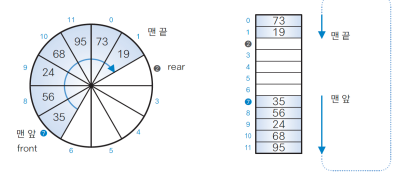



### 덱 deque
- 맨 앞과 맨 끝 양쪽에서 데이터를 넣고 꺼낼 수 있는
<br>양방향 대기열 자료구조
- 두개의 포인터 사용
- 큐와 스택을 합친 형태

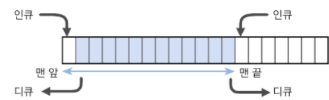

In [ ]:
# 고정된 길이의 큐클래스
%%writefile fixed_queue_test.py
from typing import Any

class FixedQueue:

    class Empty(Exception):
        pass
    class Full(Exception):
        pass

    def __init__(self, capacity: int) -> None:
        self.no = 0
        self.front = 0
        self.rear = 0
        self.capacity = capacity
        self.que = [None] * capacity

    def __len__(self) -> int:
        return self.no

    def is_empty(self) -> bool:
        return self.no <= 0

    def is_full(self) -> bool:
        return self.no >= self.capacity

    def enqueue(self, x: Any) -> None:
        if self.is_full():
            raise FixedQueue.Full
        self.que[self.rear] = x
        self.rear += 1
        self.no += 1
        if self.rear == self.capacity:
            # 끝값에 도달하면 인덱스 0으로 재지정
            self.rear = 0

    def dequeue(self) -> Any:
        if self.is_empty():
            raise FixedQueue.Empty
        x = self.que[self.front]
        self.front += 1
        self.no -= 1
        if self.front == self.capacity:
            self.front = 0
        return x

    def peek(self) -> Any:
        if self.is_empty():
            raise FixedQueue.Empty
        return self.que[self.front]

    def find(self, value: Any) -> Any:
        for i in range(self.no):
            # 스캔하는 큐의 인덱스 계산식
            idx = (i + self.front) % self.capacity

            if self.que[idx] == value:
                return idx
        return -1

    def count(self, value: Any) -> bool:
        c = 0
        for i in range(self.no):
            idx = (i + self.front) % self.capacity
            if self.que[idx] == value:
                c += 1
        return c

    def __contains__(self, value: Any) -> bool:
        return self.count(value)

    def clear(self) -> None:
        self.no = self.front = self.rear = 0

    def dump(self) -> None:
        if self.is_empty():
            print('큐가 비었습니다.')
        else:
            for i in range(self.no):
                print(self.que[(i + self.front) % self.capacity], end='')
            print()

Overwriting fixed_queue_test.py


In [ ]:
# 큐 프로그램 실행
from enum import Enum
from fixed_queue_test import FixedQueue

Menu = Enum('Menu', ['인큐','디큐','피크','검색','덤프','종료'])

def select_menu() -> Menu:
    s = [f'({m.value}){m.name}' for m in Menu]
    while True:
        print(*s, sep = '   ', end='')
        n = int(input(': '))
        if 1 <= n <= len(Menu):
            return Menu(n)

q = FixedQueue(64)

while True:
    print(f'현재 데이터 개수: {len(q)} / {q.capacity}')
    menu = select_menu()

    if menu == Menu.인큐:
        x = int(input('인큐할 데이터를 입력하세요.: '))
        try:
            q.enqueue(x)
        except FixedQueue.Full:
            print('큐가 가득 찼습니다.')

    elif menu == Menu.디큐:
        try:
            x = q.dequeue()
            print(f'디큐한 데이터는 {x}입니다.')
        except FixedQueue.Empty:
            print('큐가 비었습니다.')

    elif menu == Menu.피크:
        try:
            x = q.peek()
            print(f'피크한 데이터는 {x}입니다.')
        except FixedQueue.Empty:
            print('큐가 비었습니다.')

    elif menu == Menu.검색:
        x = int(input('검색할 값을 입력하세요.: '))
        if x in q:
            print(f'{q.count(x)}개가 포함되고, 맨 앞의 위치는 {q.find(x)}입니다.')
        else:
            print('검색값을 찾을 수 없습니다.')

    elif menu == Menu.덤프:
        q.dump()
    else:
        break

현재 데이터 개수: 0 / 64
(1)인큐   (2)디큐   (3)피크   (4)검색   (5)덤프   (6)종료: 1
인큐할 데이터를 입력하세요.: 56
현재 데이터 개수: 1 / 64
(1)인큐   (2)디큐   (3)피크   (4)검색   (5)덤프   (6)종료: 4
검색할 값을 입력하세요.: 56
1개가 포함되고, 맨 앞의 위치는 0입니다.
현재 데이터 개수: 1 / 64
(1)인큐   (2)디큐   (3)피크   (4)검색   (5)덤프   (6)종료: 6


In [ ]:
# 링 버퍼 테스트
n = int(input('정수를 몇 개 저장할까요?: '))
a = [None] * n

cnt = 0
while True:
    a[cnt%n] = int(input((f'{cnt+1}번째 정수를 입력하세요.: ')))
    cnt += 1

    retry = input(f'계속 할까요?(Y...Yes / N...No)')
    if retry in {'N','n'}:
        break

i = cnt -n
if i<0: i=0

while i<cnt:
    print(f'{i+1}번째 = {a[i%n]}')
    i+=1

정수를 몇 개 저장할까요?: 10
1번째 정수를 입력하세요.: 15
계속 할까요?(Y...Yes / N...No)N
1번째 = 15
